In [3]:
import pandas as pd

df = pd.read_csv('Ifood_new (1).csv')
df.dropna(inplace=True)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [ ]:
df.describe()


,prep_time,cook_time
count,253.000000,253.000000
mean,31.154150,34.644269
std,72.827448,48.437326
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [7]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East,https://www.crazymasalafood.com/wp-content/ima...
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...


In [8]:


print(df.head())
print(df.isnull().sum())  # Check for missing values


                name                                        ingredients  \
0          Adhirasam   Rice flour, jaggery, ghee, vegetable oil, elachi   
1          Aloo gobi  Cauliflower, potato, garam masala, turmeric, c...   
2         Aloo matar  Potato, peas, chillies, ginger, garam masala, ...   
3         Aloo methi      Potato, fenugreek leaves, chillies, salt, oil   
4  Aloo shimla mirch  Potato, shimla mirch, garam masala, amchur pow...   

         diet  prep_time  cook_time flavor_profile       course        state  \
0  vegetarian         10         50          sweet      dessert  West Bengal   
1  vegetarian         10         20          spicy  main course       Punjab   
2  vegetarian          5         40          spicy  main course       Punjab   
3  vegetarian         10         40         bitter  main course       Punjab   
4  vegetarian         10         40          spicy  main course       Punjab   

  region                                            img_url  
0   Ea

In [ ]:
def extract_minutes(time_val):
    if pd.isnull(time_val):
        return 0
    if isinstance(time_val, int):  
        return time_val
    return int(''.join(filter(str.isdigit, str(time_val))))


In [11]:
df['prep_time'] = df['prep_time'].apply(extract_minutes)
df['cook_time'] = df['cook_time'].apply(extract_minutes)


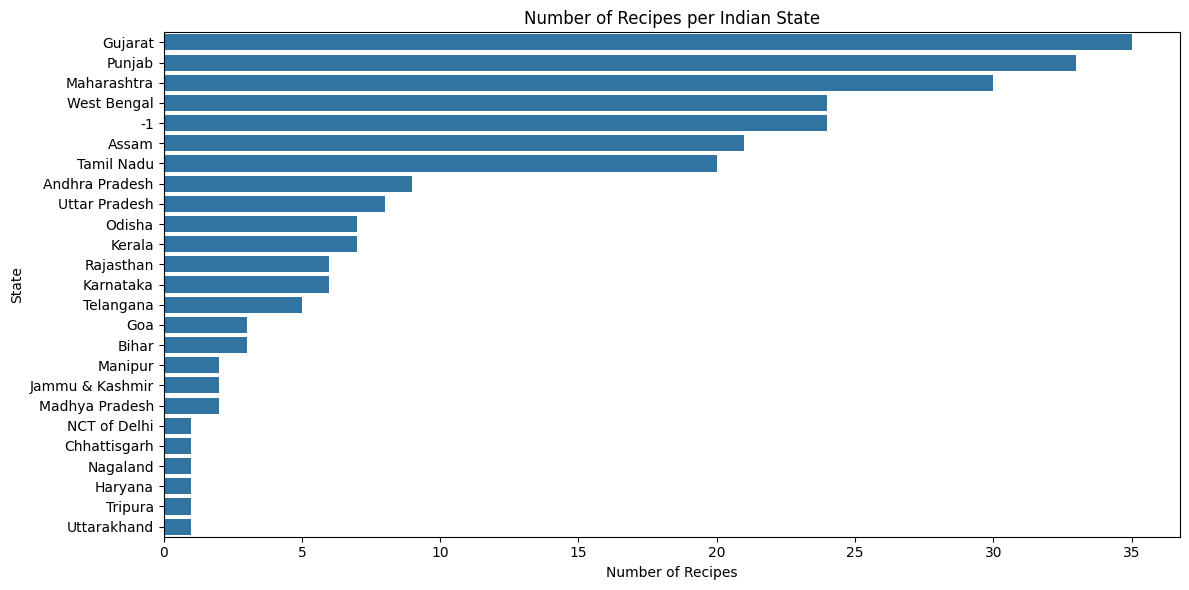

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='state', order=df['state'].value_counts().index)
plt.title('Number of Recipes per Indian State')
plt.xlabel('Number of Recipes')
plt.ylabel('State')
plt.tight_layout()
plt.show()


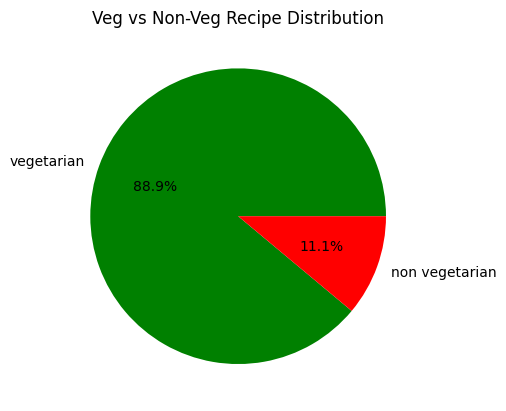

In [13]:
df['diet'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Veg vs Non-Veg Recipe Distribution')
plt.ylabel('')
plt.show()


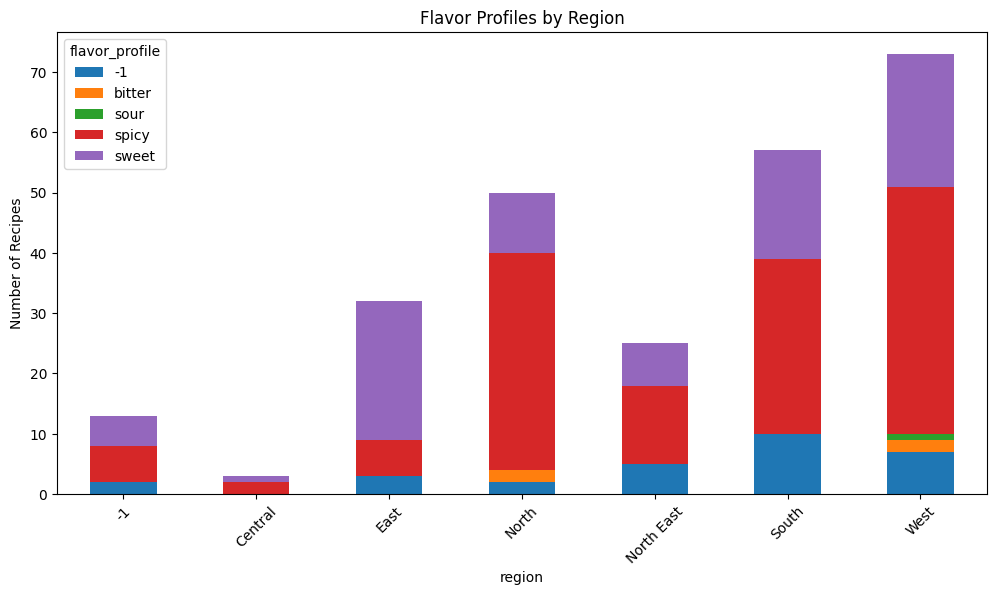

In [14]:
flavor_region = df.groupby(['region', 'flavor_profile']).size().unstack().fillna(0)
flavor_region.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Flavor Profiles by Region')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.show()


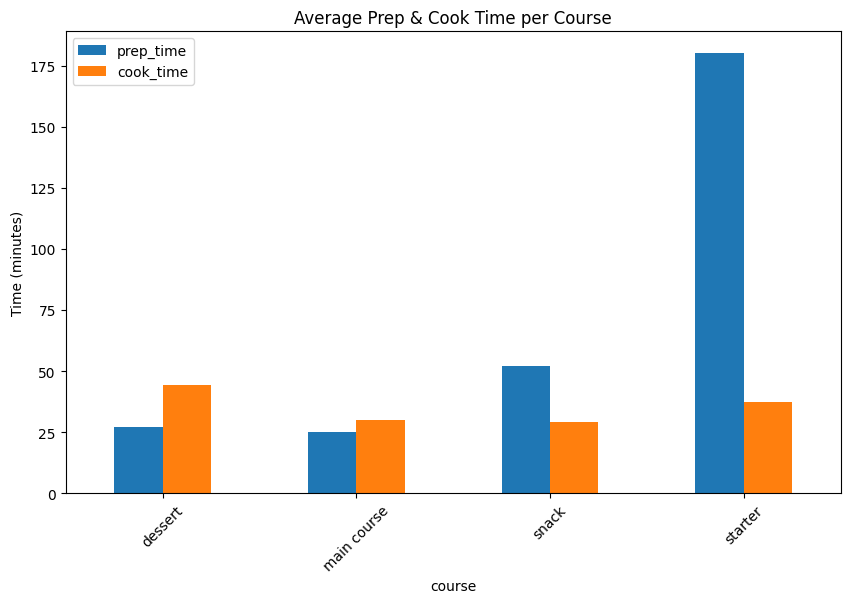

In [15]:
course_time = df.groupby('course')[['prep_time', 'cook_time']].mean()
course_time.plot(kind='bar', figsize=(10,6))
plt.title('Average Prep & Cook Time per Course')
plt.ylabel('Time (minutes)')
plt.xticks(rotation=45)
plt.show()


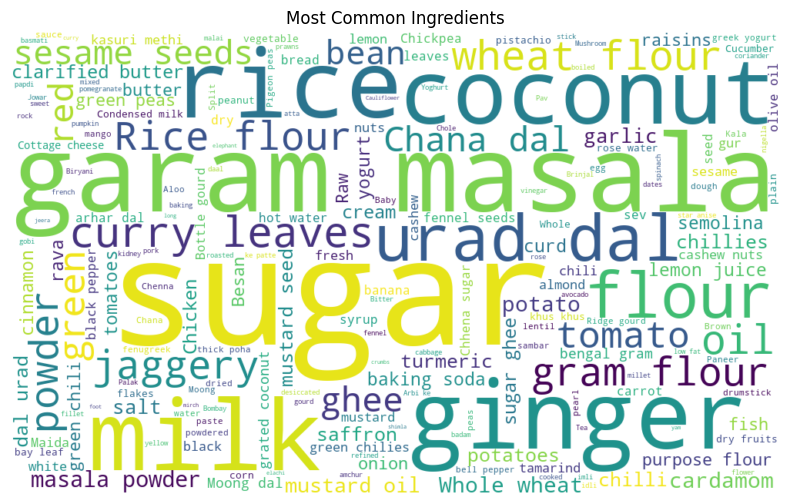

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ingredients_text = ' '.join(df['ingredients'].dropna().tolist())

wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(ingredients_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Ingredients')
plt.show()
